# Linear Regression


Simple Linear Regression Model

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from sklearn.metrics import r2_score  # For calculating R-squared (accuracy measure)

# Define the data points
x = [8, 10, 12, 14, 16, 18, 20]  # Independent variable (e.g., engine size)
y = [10, 13, 16, 19, 22, 25, 27]  # Dependent variable (e.g., fuel efficiency)

# Plot the original data points as red circles ('ro')
plt.plot(x, y, 'ro')

# Create a linear regression model (degree=1) using numpy's polyfit
# polyfit finds the coefficients of the best-fit line (y = mx + b)
# poly1d creates a function from these coefficients that we can use to predict y values
Prediction_func = np.poly1d(np.polyfit(x, y, 1))

# Make a prediction for a new x value (39)
p__x = 39  # New x value to predict
p__y = Prediction_func(p__x)  # Predicted y value for x=39
print("The prediction is : ", p__y)

# Calculate and print the R-squared score (measure of how well the line fits the data)
# R-squared ranges from 0 to 1, where 1 is perfect fit
print(f"Accuracy is : {r2_score(y, Prediction_func(x))}")

# Plot the regression line
# np.unique(x) ensures we plot the line across the full x-range
plt.plot(np.unique(x), Prediction_func(np.unique(x)))

# Plot the predicted point (x=39, y=predicted value) as a blue dot
plt.scatter(p__x, p__y, color='Blue')

# Display the plot
plt.show()

Linear Regression Model using csv file

In [ ]:
# Import the pandas library for data manipulation
import pandas

# Import the linear_model module from scikit-learn for regression
from sklearn import linear_model 

# Load the car dataset from a CSV file into a DataFrame
df = pandas.read_csv("Car_data.csv")

# Select the features (independent variables) - Weight and Volume
X = df[['Weight', 'Volume']]

# Select the target variable (dependent variable) - CO2 emissions
y = df['CO2']

# Create a linear regression model object
regr = linear_model.LinearRegression()

# Train the model using the features (X) and target (y)
regr.fit(X, y)

# Make predictions on the same feature set (Note: This should probably use new data)
# There's a small issue here - 'x' should be 'X' to use the training data
# Or better yet, use a test set that wasn't used for training
y_predict = regr.predict(X)

# Predict CO2 emissions for a specific car (example with hardcoded values)
# Normally you might ask for user input:
# weight = int(input("Weight of car : "))
# volume = int(input("Volume of car :  "))
weight = 2300  # Weight in grams
volume = 1300  # Volume in cubic centimeters

# Use the trained model to predict CO2 emissions for this specific car
predictedCO2 = regr.predict([[weight, volume]])

# Print the prediction result
print(f"Your car's predicted CO2 emission is {predictedCO2}")

# Logistic Regression
Logistic regression use descrete or categorical data 

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
import matplotlib.pyplot as plt  # For plotting (though not used in this code)

# Load the dataset from a CSV file
data = pd.read_csv("suv_purchase_survey_589.csv")

# Convert categorical 'Gender' column into numerical using one-hot encoding
# drop_first=True means we'll represent Male as 1 and Female as 0 (binary)
Gender = pd.get_dummies(data['Gender'], drop_first=True)

# Combine the original data with the new Gender column
data = pd.concat([data, Gender], axis=1)

# Remove the original 'Gender' column since we now have the numerical version
data.drop(['Gender'], inplace=True, axis=1)

# Display the first few rows of the modified dataset
print(data.head())

# Prepare features (x) and target (y) variables
# Here we're selecting columns at index 2 and 4 for features (typically Age and EstimatedSalary)
# and column at index 3 for target (Purchased)
x = data.iloc[:, [2, 4]].values
y = data.iloc[:, 3].values

# Standardize the features (mean=0, std=1) for better model performance
std_scl = StandardScaler()
x = std_scl.fit_transform(x)

# Split the data into training (70%) and testing (30%) sets
# random_state ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(x_test)

# Import metrics to evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate and print the accuracy score (percentage of correct predictions)
print(f"Accuracy score is : {round(accuracy_score(y_test, y_pred)*100, 3)}%")

# This section would normally take user input to make a prediction
# For demonstration, we're using hardcoded values instead
# g = bool(input("Is male ?"))  # Would ask if user is male (True/False)
# s = int(input("Salary ? "))   # Would ask for salary input
g = True  # Example: User is male
s = 32000  # Example: User's salary is 32000

# Prepare the input data in the same format as training data
input_sec = [[g, s]]

# Make a prediction for this specific case
y_predict = model.predict(input_sec)

# Print the prediction result
print("Yes " if y_predict == 1 else "NO")  # 1 means predicted to purchase, 0 means not

In [ ]:
# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score separately
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Decesion Tree Algorithm


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset from CSV file
df = pd.read_csv("Decesion_data.csv")

# Convert categorical 'Nationality' to numerical values using a dictionary mapping
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

# Convert categorical 'Go' (target variable) to numerical values
d = {'NO': 0, 'YES': 1}
df['Go'] = df['Go'].map(d)

# Display the transformed dataframe
print(df)

# Define feature columns (independent variables)
features = ["Age", "Experience", "Rank", "Nationality"]
X = df[features]  # Features matrix
Y = df['Go']      # Target variable

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X, Y)  # Train the model on our data

# Get user input for prediction

# age = int(input("Enter Age: "))
# Exp = int(input("Enter year of experience: "))
# rank = int(input("Enter Rank: "))
# Nation = input("USA / UK / N: ")

age = 35
Exp = 5
rank = 8
Nation = "USA"


# Convert user's nationality input to numerical value
if Nation == "USA":
    Nation = 1
elif Nation == "UK":
    Nation = 0
elif Nation == "N":
    Nation = 2

# Prepare input data for prediction
input_value = [age, Exp, rank, Nation]
input_value = pd.DataFrame([input_value], columns=["Age", "Experience", "Rank", "Nationality"])

# Make prediction
prediction = dtree.predict(input_value)

# Display prediction result
if prediction == [0]:
    print("NO")  # Model predicts "Don't Go"
else:
    print("YES")  # Model predicts "Go"

# Random Forest Algorithm
use google collab note for this here is the link 
https://colab.research.google.com/drive/10UBmz1zjp3CY2QKe87frbGwQVpc9MJ33?usp=sharing

# KNN Algorithm


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. DATA LOADING & PREPROCESSING
# ------------------------------
# Load movie dataset
data = pd.read_csv("movie_dataset_1000.csv")

# Preview the first few rows
data.head()

# Convert target variable 'hit' to binary (1 for 'Yes', 0 for 'No')
data['hit'] = data['hit'].map({'Yes': 1, 'No': 0})

# Encode categorical 'genre' column to numerical values
le = LabelEncoder()
data['genre'] = le.fit_transform(data['genre'])

# 2. FEATURE SELECTION & TRAIN-TEST SPLIT
# --------------------------------------
# Select features for modeling
feature = ['genre', 'duration', 'average_rating']
x = data[feature]
y = data['hit']

# Split data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3, 
    random_state=1  # For reproducibility
)

# 3. MODEL TRAINING & EVALUATION
# -----------------------------
# Create KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=34)

# Train the model
knn.fit(x_train, y_train)

# Make predictions on test set
y_predict = knn.predict(x_test)

# Calculate and print accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)*100:.2f}%")
# 5. MAKING NEW PREDICTIONS
# -------------------------
# New movie data to predict (genre, duration, average_rating)
new_movie_data = ['Fantasy', 163, 6.7]

# Create DataFrame with same structure as training data
new_movie = pd.DataFrame([new_movie_data], 
                         columns=['genre', 'duration', 'average_rating'])

# Encode the genre using the same LabelEncoder
new_movie['genre'] = le.transform(new_movie['genre'])

# Make prediction
prediction = knn.predict(new_movie)

# Display prediction result (1 for Hit, 0 for Flop)
print(f"Prediction: {'Hit' if prediction[0] == 1 else 'Flop'}")

In [ ]:
# 4. FINDING OPTIMAL K VALUE
# --------------------------
error_rate = []

# Test different K values from 1 to 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    error_rate.append(accuracy_score(y_test, y_predict))

# Plot accuracy vs K values
plt.figure(figsize=(10, 3))
plt.plot(range(1, 40), error_rate, 
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy Rate')
plt.show()

# Naive Bayes Classifier

In [ ]:
# Import required libraries

import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. DATA LOADING & PREPROCESSING
# ------------------------------
# Load the football play dataset
data = pd.read_csv("football_play_dataset_categorical.csv")

# Convert all columns to categorical type and then to numerical codes
data = data.apply(lambda x: x.astype('category'))  # Convert to categorical
data = data.apply(lambda x: x.cat.codes)          # Convert categories to numerical codes

# Display the transformed data
print("Transformed Data:\n", data.head())



# 2. FEATURE/TARGET SELECTION
# ---------------------------
# Select features (weather conditions) and target (play decision)
feature = ['outlook', 'temperature', 'humidity', 'windy']
x = data[feature]  # Features
y = data['play']   # Target variable (1=play, 0=don't play)

# 3. TRAIN-TEST SPLIT
# -------------------
# Split data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3, 
    random_state=1  # For reproducible results
)

# 4. MODEL TRAINING
# -----------------
# Create Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model on training data
nb.fit(x_train, y_train)

# 5. MODEL EVALUATION
# -------------------
# Make predictions on test set
y_out = nb.predict(x_test)

# Calculate and print accuracy
print("\nModel Accuracy: {:.2f}%".format(accuracy_score(y_test, y_out)*100))

# 6. MAKING NEW PREDICTIONS
# -------------------------
# New weather conditions to predict (using encoded values):
# outlook=0, temperature=2, humidity=0, windy=0
new_data = [0, 2, 0, 0]

# Convert to DataFrame with correct feature names
new_data = pd.DataFrame([new_data], columns=feature)

# Make prediction
prediction = nb.predict(new_data)

# Convert prediction to human-readable result
result = "YES (Play)" if prediction == 1 else "NO (Don't Play)"
print("\nPrediction for new conditions:", result)

# Support Vector Machine 

### Linear Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. LOAD IRIS DATASET
# --------------------
iris = datasets.load_iris()

# Select petal length (index 2) and petal width (index 3) as features
X = iris['data'][:, (2,3)]  # All rows, columns 2 and 3
y = iris['target']           # Flower species (0=setosa, 1=versicolor, 2=virginica)

# 2. FILTER DATA (ONLY SETOSA & VERSICOLOR)
# -----------------------------------------
# Create boolean mask for setosa (0) and versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 3. VISUALIZE THE DATA
# ---------------------
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], label="Setosa", color='red')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], label="Versicolor", color='blue')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Flower Classification")
plt.legend()
plt.show()

# 4. TRAIN SVM CLASSIFIER
# -----------------------
# Create SVM with linear kernel and large margin (C=infinity)
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Get the decision boundary parameters (weights and intercept)
print("Model Coefficients:", svm_clf.coef_)
print("Model Intercept:", svm_clf.intercept_)

# 5. PLOT DECISION BOUNDARY
# -------------------------
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]       # Weight vector [w1, w2]
    b = svm_clf.intercept_[0]  # Bias term
    
    # Generate x values for the decision boundary line
    x0 = np.linspace(xmin, xmax, 200)
    
    # Calculate decision boundary (w1*x0 + w2*y + b = 0 → y = (-w1/w2)x0 - b/w2)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    # Calculate margin boundaries (1 unit from decision boundary)
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # Plot support vectors (critical data points)
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', label="Support Vectors")
    
    # Plot decision boundary and margins
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="Decision Boundary")
    plt.plot(x0, gutter_up, "k--", linewidth=2, label="Margin")
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
# Visualize the SVM model
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="Versicolor")
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="Setosa")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("SVM Decision Boundary")
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

# 6. TRAIN-TEST SPLIT & EVALUATION
# --------------------------------
# Split data into 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train SVM on training data
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_predict = svm_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"\nModel Accuracy: {accuracy:.2%}")

# 7. EXAMPLE PREDICTION
# ---------------------
# Predict class for new flower with petal length=3cm, width=1cm
new_flower = np.array([[3, 1]])
prediction = svm_clf.predict(new_flower)
species = "Setosa" if prediction == 0 else "Versicolor"
print(f"Prediction for [3, 1]: {species}")

### For polynomial Karner Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. LOAD AND PREPARE IRIS DATASET
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # Petal length and width
y = iris.target

# Filter only Setosa (0) and Versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 2. VISUALIZE THE DATA
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', label='Setosa', edgecolor='k')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', label='Versicolor', edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flowers: Setosa vs Versicolor')
plt.legend()
plt.grid(True)
plt.show()

# 3. SVM WITH DIFFERENT KERNELS
def plot_svm_boundary(model, X, y, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, 
                edgecolors='k', s=50)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.show()

# Create and plot different SVM kernels
kernels = [
   
    ('Polynomial Kernel (degree=3)', SVC(kernel='poly', degree=3, C=1)),
   
]

for name, model in kernels:
    model.fit(X, y)
    plot_svm_boundary(model, X, y, name)

# 4. TRAIN-TEST SPLIT AND EVALUATION
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with linear kernel
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 5. PREDICT NEW SAMPLES
def predict_new_sample(model, scaler, petal_length, petal_width):
    sample = np.array([[petal_length, petal_width]])
    sample_scaled = scaler.transform(sample)
    prediction = model.predict(sample_scaled)
    return "Setosa" if prediction == 0 else "Versicolor"

# Example predictions
print("\nSample Predictions:")
print(f"Petal 3cm x 1cm: {predict_new_sample(svm_clf, scaler, 3, 1)}")
print(f"Petal 5cm x 1.5cm: {predict_new_sample(svm_clf, scaler, 5, 1.5)}")

### RBF (Gaussian) Kernel SVM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris flower dataset
iris = datasets.load_iris()

# Select only petal length (column 2) and width (column 3) as features
X = iris['data'][:, (2,3)]
# Target variable (0=setosa, 1=versicolor, 2=virginica)
y = iris['target']

# Filter to keep only setosa (0) and versicolor (1) flowers
setosa_or_versicolor = (y == 0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Plot the data points
plt.scatter(X[:, 0][y==0], X[:,1][y==0], label = "setosa")  # Setosa flowers
plt.scatter(X[:, 0][y==1], X[:,1][y==1], label = "versicolor")  # Versicolor flowers
plt.legend()  # Show legend
plt.show()  # Display plot

# Function to plot SVM decision boundary
def plot_svm_boundary(model, X, y):
    h = 0.02  # Step size for mesh grid
    # Define plot boundaries with 1cm margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create mesh grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape for contour plot

    # Plot decision boundary and regions
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.show()

# Create RBF (Radial Basis Function) kernel SVM
# gamma controls how far influence of single training example reaches
# C controls trade-off between smooth boundary and correct classification
rbf_svm = SVC(kernel='rbf', gamma=2, C=5)
rbf_svm.fit(X, y)  # Train the model
plot_svm_boundary(rbf_svm, X, y)  # Visualize decision boundary

### Sigmoid Kernel SVM

In [ ]:
# Import libraries for math, data, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import SVM and dataset tools
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris flower dataset (contains measurements and species)
iris = datasets.load_iris()

# Use only petal length (column 2) and width (column 3) as features
X = iris['data'][:, (2,3)]
# Flower types: 0=setosa, 1=versicolor, 2=virginica
y = iris['target']

# Keep only setosa (0) and versicolor (1) flowers
setosa_or_versicolor = (y == 0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Plot the flower data points
plt.scatter(X[:, 0][y==0], X[:,1][y==0], label="setosa")  # Blue points
plt.scatter(X[:, 0][y==1], X[:,1][y==1], label="versicolor")  # Orange points
plt.legend()  # Show color labels
plt.show()  # Display plot

# Function to visualize SVM decision boundary
def plot_svm_boundary(model, X, y):
    h = 0.02  # Grid spacing for boundary plot
    
    # Set plot area limits with 1cm margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict flower type for each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape for plotting

    # Draw colored regions (blue=setosa, orange=versicolor)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot original data points with black edges
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.show()

# Create SVM with sigmoid kernel
# Sigmoid transforms data using tanh function
# C=5 balances accuracy vs. smooth boundary
sigmoid_svm = SVC(kernel='sigmoid', C=5)
sigmoid_svm.fit(X, y)  # Train model
plot_svm_boundary(sigmoid_svm, X, y)  # Show decision boundary

# K-Mean Clustering Algorithm 
This is a unsupervised Algorithm. 

Unique clusters: [0 1 3 2]
     Movie  Director_Likes  Actor_Likes  cluster
0  Movie_1             302          470        0
1  Movie_2             556          671        1
2  Movie_3             110           70        3
3  Movie_4             132          124        3
4  Movie_5             287          299        2


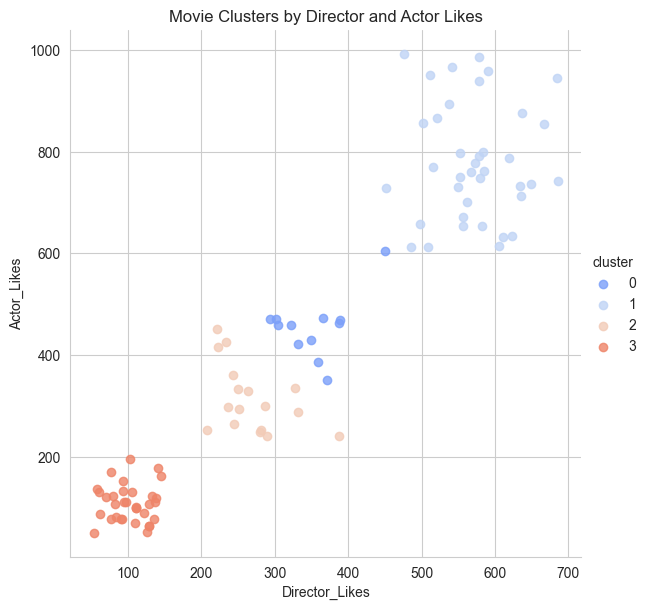

Cluster for new movie: 1
Hit


c:\Users\This PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt

# 1. LOAD DATA
# ------------
# Read movie likes dataset (contains movie names and engagement metrics)
data = pd.read_csv("movie_likes_dataset.csv")

# 2. PREPARE FEATURES
# -------------------
# Remove movie names (we only want numerical features)
Feature = data.drop('Movie', axis=1)

# Scale features so all have equal importance
STl = StandardScaler()
Feature_scaled = STl.fit_transform(Feature)

# 3. CLUSTERING
# -------------
# Create K-means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit model and assign clusters (only need fit_predict once)
data['cluster'] = kmeans.fit_predict(Feature_scaled)

# Show results
print("Unique clusters:", data.cluster.unique())
print(data.head())

# 4. VISUALIZATION
# ----------------
# Plot clusters using original (unscaled) data
sns.set_style("whitegrid")
sns.lmplot(x='Director_Likes', y='Actor_Likes', 
           data=data, 
           hue='cluster',          # Color by cluster
           palette='coolwarm',     # Color scheme
           height=6,              # Plot size
           aspect=1,              # Width/height ratio
           fit_reg=False)         # Don't show trend lines
plt.title('Movie Clusters by Director and Actor Likes')
plt.show()

# 5. PREDICT NEW MOVIE
# --------------------
# Example new movie data [Director_Likes, Actor_Likes]
new_movie = [[455, 784]]

# Scale using the same scaler as training data
new_movie_scaled = STl.transform(new_movie)

# Predict cluster
cluster = kmeans.predict(new_movie_scaled)
print("Cluster for new movie:", cluster[0])

# Simple business rule (assuming cluster 1 is "hit")
print("Hit" if cluster[0] == 1 else "Flop")